In [ ]:
from pathlib import Path

import numpy as np

root = Path(
    "/Users/hagayuya/Library/CloudStorage/GoogleDrive-haga.yuya2.2016@gmail.com/マイドライブ/ASI/Image of coin (Senop camera)"
)

In [25]:
dat_path = root / "HSI_snapshot__20212101144836.dat"
header_path = root / "HSI_snapshot__20212101144836.hdr"
!code "{header_path}"

In [ ]:
from asi import parse_envi_header

with header_path.open("r") as f:
    header_content = f.readlines()
header = parse_envi_header(header_content)


In [39]:
interleave = header["interleave"]
samples = header["samples"]
lines = header["lines"]
bands = header["bands"]
print(interleave)

with dat_path.open("rb") as fopen:
    raw_array = np.fromfile(fopen, dtype=">u2")

BSQ


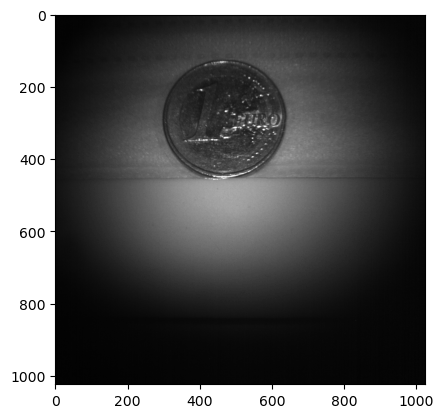

In [ ]:
import matplotlib.pyplot as plt

# Convert the string values of samples, lines, and bands to integers
samples = int(samples)
lines = int(lines)
bands = int(bands)

# Reshape the raw_array based on BSQ interleave
raw_image = raw_array.reshape((bands, samples, lines))

plt.imshow(raw_image[4, :, :], cmap="gray")
plt.savefig('./')

(1024, 1024, 18)